In [1]:
import numpy as np
import MyML
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(10000,2)

In [3]:
r = X[:,1]>.5

In [4]:
s = X[:,0]>.5

In [5]:
X1 = X[s*r]


In [6]:
t = X[:,0]<.5
u = X[:,1]<.5

In [7]:
X2 = X[t*u]

In [8]:
Xpos = np.row_stack((X1,X2))
Xpos = np.column_stack((Xpos,np.ones(len(Xpos[:,0]))))

In [9]:
X3 = X[r*t]
X4 = X[s*u]
Xneg = np.row_stack((X3,X4))
Xneg = np.column_stack((Xneg,np.zeros(len(Xneg[:,0]))))
X = np.row_stack((Xpos,Xneg))

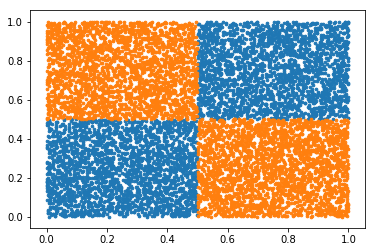

In [10]:
plt.scatter(Xpos[:,0],Xpos[:,1], s = 7)
plt.scatter(Xneg[:,0],Xneg[:,1], s = 7)

In [11]:
list = []
nnmodel = MyML.NeuralNetwork(indims = 2,nodes = [10,10,10,1], activations = ['tanh','tanh','tanh'], taskType = 'c')

In [12]:
Xs = X[:,0:2]
Ys = X[:,2].reshape(-1,1)

In [13]:
nnmodel.layers[0].weights.shape

(2, 10)

In [14]:
train,val,test = MyML.TVTsplit(X, .7)

In [15]:
Xtrain = train[:,:2]
Ytrain = train[:,2].reshape(-1,1)


In [16]:
Xval = val[:,:2]
Yval = val[:,2].reshape(-1,1)

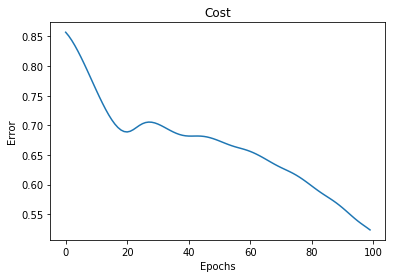

In [17]:
nnmodel.train(Xtrain,Ytrain, epochs = 100, lr = .005,moment = .9,gamma = .8, optim = 'adam')

In [18]:
nnmodel.predict(Xval)

array([[0.85714843],
       [0.56843135],
       [0.33230141],
       ...,
       [0.33935986],
       [0.6387545 ],
       [0.33101958]])

In [28]:
r = val[np.where(val[:,2] == 1)[0],][1:100,]

In [20]:
len(r)

99

In [31]:
l = MyML.sample(r,20000)

In [33]:
len(l)

20000

In [22]:
help(MyML.SupportFunctions)

Help on package MyML.SupportFunctions in MyML:

NAME
    MyML.SupportFunctions

PACKAGE CONTENTS
    Smote
    TVTsplit
    accuracy
    activations
    colorPredictions
    confusion
    costs
    f1
    precision
    recall
    sample

FILE
    /home/donald/DataScienceTraining/MyML/SupportFunctions/__init__.py


